# Homework 1 - Solutions

Using only the numpy and matplotlib libraries, perform a polynomial regression of the provided dataset. Determine what power of the polynomial best fits the data.

In [1]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt

# import uniform distribution
from scipy.stats import uniform
from scipy.stats import norm

# generate random numbers from N(-10,10)
n = 200
start = -10
width = 20
x = uniform.rvs(size=n, loc = start, scale=width)

# generate Gaussian noise
epsilon1 = norm.rvs(size=n,loc=0,scale=0.1)
epsilon2 = norm.rvs(size=n,loc=0,scale=8)

y = 20 + 4*x + 0.2 * x**2 +0.05*x**3

y = y*(1+epsilon1)+epsilon2

# define data
data = x,y
# save to npy file
np.save('data.npy', data)


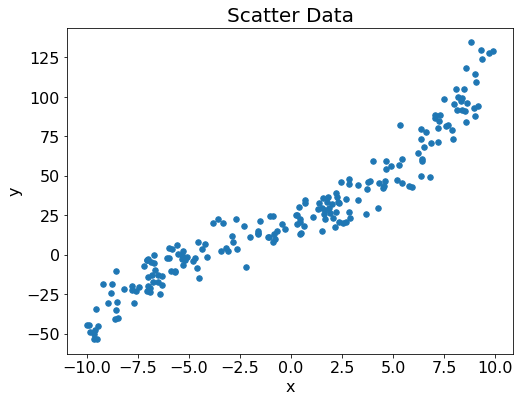

In [2]:
# load array
x, y = np.load('data.npy')

# Plot the loaded data set
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = '16'
plt.scatter(x, y, s = 30, marker = 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Data', fontsize=20)
plt.show()

Linear regression coefficients
  β0   =  27.257052122323817 
  β1   =  6.851405654425395
  RMSE =  185.35533529858665
  R2   =  0.9040654910198994


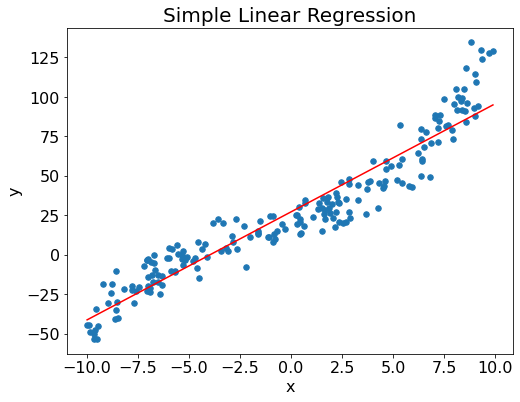

In [3]:
# Start with a linear regression

# Convert the vector of y variables into a column vector
n = len(y)
Y = y.reshape(n,1)

# Create matrix X by adding x0=1 to each instance of x and taking the transpose
X = np.array([np.ones(len(x)), x.flatten()]).T

XTXinv = np.linalg.inv(np.matmul(X.T, X))
beta = np.matmul(XTXinv, np.matmul(X.T, Y))

# Display best values obtained.
print("Linear regression coefficients\n  β0   = ", beta[0,0], "\n  β1   = ", beta[1,0])

# Calculate the hat matrix
H = X @ (XTXinv @ X.T)

# Create a column vector of 1's with length 100
l = np.full((n,1), 1)

# Calculate the matrix M
lTlinv = np.linalg.inv(np.matmul(l.T, l))
M = l @ (lTlinv @l.T)

# Calculate the RMSE
RMSE = np.sqrt(np.sum((Y-H@Y)**2))
print("  RMSE = ", RMSE)

# Calculate R2
R2 = 1 - (Y.T@(np.eye(n)-H) @ Y) / (y.T@(np.eye(n)-M) @ Y)
print("  R2   = ", R2[0,0])

# Apply the hat matrix to the y values
y_predicted = np.matmul(H, Y)

# Range of x values
x_sample = np.linspace(np.min(x), np.max(x), 100)
X_sample = np.array([np.ones(len(x_sample)), x_sample.flatten()]).T
y_predicted = X_sample @ beta

# Plot the output.
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = '16'
plt.scatter(x, y, s=30, marker='o')
plt.plot(x_sample, y_predicted, c='red')
plt.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression', fontsize=20)
plt.show()

Matrix X =
 [[ 1.          1.52323109  2.32023296]
 [ 1.          3.72596383 13.88280646]
 [ 1.         -5.99152977 35.89842897]
 [ 1.          0.65512464  0.42918829]] 
 ...

Linear regression coefficients
  β0 =  20.153059497371185   β1 =  6.908756808321294   β2 =  0.20608416665218948
  RMSE =  164.56254229281595
  R2   =  0.9243817451199406


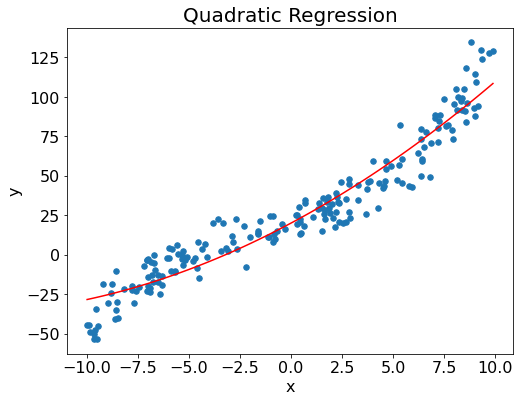

In [4]:
# Quadratic regression

# Create matrix X by adding x0=1 and x2 = x^2 to each instance of x and taking the transpose
X = np.array([np.ones(len(x)), x.flatten(), (x*x).flatten()]).T
print("Matrix X =\n", X[1:5, :], "\n ...\n")

XTXinv = np.linalg.inv(np.matmul(X.T, X))
beta = np.matmul(XTXinv, np.matmul(X.T, Y))

# Display best values obtained.
print("Linear regression coefficients\n  β0 = ",
      beta[0,0], "  β1 = ", beta[1,0], "  β2 = ", beta[2,0])

# Calculate the hat matrix
H = X @ (XTXinv @ X.T)

# Create a column vector of 1's with length 100
l = np.full((n,1), 1)

# Calculate the matrix M
lTlinv = np.linalg.inv(np.matmul(l.T, l))
M = l @ (lTlinv @l.T)

# Calculate the RMSE
RMSE = np.sqrt(np.sum((Y-H@Y)**2))
print("  RMSE = ", RMSE)

# Calculate R2
R2 = 1 - (Y.T@(np.eye(n)-H) @ Y) / (y.T@(np.eye(n)-M) @ Y)
print("  R2   = ", R2[0,0])

# Apply the hat matrix to the y values
y_predicted = np.matmul(H, Y)

# Range of x values
x_sample = np.linspace(np.min(x), np.max(x), 100)
X_sample = np.array([np.ones(len(x_sample)), x_sample.flatten(), (x_sample*x_sample).flatten()]).T
y_predicted = X_sample @ beta

# Plot the output.
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = '16'
plt.scatter(x, y, s=30, marker='o')
plt.plot(x_sample, y_predicted, c='red')
plt.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Regression', fontsize=20)
plt.show()

Matrix X =
 [[   1.            1.52323109    2.32023296    3.53425099]
 [   1.            3.72596383   13.88280646   51.72683473]
 [   1.           -5.99152977   35.89842897 -215.08650586]
 [   1.            0.65512464    0.42918829    0.28117182]] 
 ...

Linear regression coefficients
  β0 =  20.395896659559302   β1 =  3.908691582559348   β2 =  0.21046256665500546   β3 =  0.05053805896138244
  RMSE =  127.66437505628245
  R2   =  0.9544902843928658


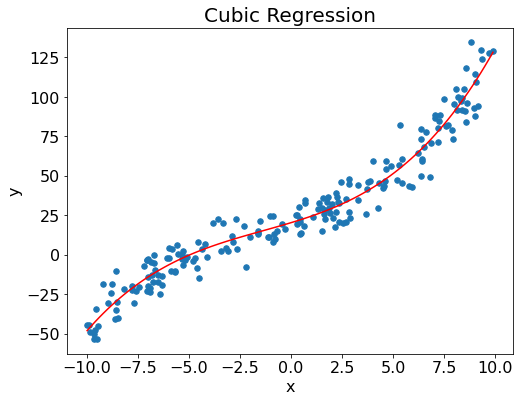

In [5]:
# Cubic regression

# Create matrix X by adding x0=1 and x2 = x^2 to each instance of x and taking the transpose
X = np.array([np.ones(len(x)), x.flatten(), (x*x).flatten(), (x**3).flatten()]).T
print("Matrix X =\n", X[1:5, :], "\n ...\n")

XTXinv = np.linalg.inv(np.matmul(X.T, X))
beta = np.matmul(XTXinv, np.matmul(X.T, Y))

# Display best values obtained.
print("Linear regression coefficients\n  β0 = ",
      beta[0,0], "  β1 = ", beta[1,0], "  β2 = ", beta[2,0], "  β3 = ", beta[3,0])

# Calculate the hat matrix
H = X @ (XTXinv @ X.T)

# Create a column vector of 1's with length 100
l = np.full((n,1), 1)

# Calculate the matrix M
lTlinv = np.linalg.inv(np.matmul(l.T, l))
M = l @ (lTlinv @l.T)

# Calculate the RMSE
RMSE = np.sqrt(np.sum((Y-H@Y)**2))
print("  RMSE = ", RMSE)

# Calculate R2
R2 = 1 - (Y.T@(np.eye(n)-H) @ Y) / (y.T@(np.eye(n)-M) @ Y)
print("  R2   = ", R2[0,0])

# Apply the hat matrix to the y values
y_predicted = np.matmul(H, Y)

# Range of x values
x_sample = np.linspace(np.min(x), np.max(x), 100)
X_sample = np.array([np.ones(len(x_sample)), x_sample.flatten(),
                     (x_sample**2).flatten(),
                     (x_sample**3).flatten()]).T
y_predicted = X_sample @ beta

# Plot the output.
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = '16'
plt.scatter(x, y, s=30, marker='o')
plt.plot(x_sample, y_predicted, c='red')
plt.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Regression', fontsize=20)
plt.show()

Matrix X =
 [[ 1.00000000e+00  1.52323109e+00  2.32023296e+00  3.53425099e+00
   5.38348099e+00]
 [ 1.00000000e+00  3.72596383e+00  1.38828065e+01  5.17268347e+01
   1.92732315e+02]
 [ 1.00000000e+00 -5.99152977e+00  3.58984290e+01 -2.15086506e+02
   1.28869720e+03]
 [ 1.00000000e+00  6.55124638e-01  4.29188292e-01  2.81171824e-01
   1.84202590e-01]] 
 ...

Linear regression coefficients
  β =  [ 2.03610719e+01  3.91159065e+00  2.13879742e-01  5.04871023e-02
 -4.07267824e-05]
  RMSE =  127.66365293548479
  R2   =  0.9544907992337403


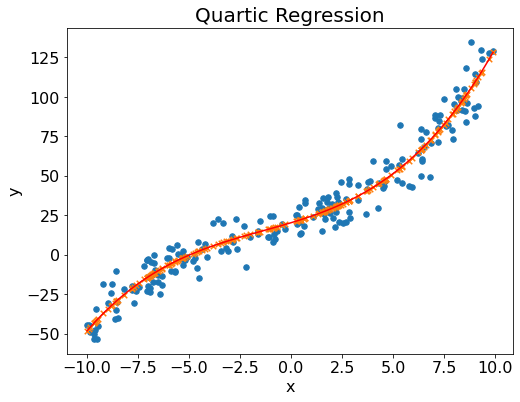

In [6]:
# Cubic regression

# Create matrix X by adding x0=1 and x2 = x^2 to each instance of x and taking the transpose
X = np.array([np.ones(len(x)),
              x.flatten(),
              (x**2).flatten(),
              (x**3).flatten(),
              (x**4).flatten()]).T
print("Matrix X =\n", X[1:5, :], "\n ...\n")

XTXinv = np.linalg.inv(np.matmul(X.T, X))
beta = np.matmul(XTXinv, np.matmul(X.T, Y))

# Display best values obtained.
print("Linear regression coefficients\n  β = ", beta[:,0])

# Calculate the hat matrix
H = X @ (XTXinv @ X.T)

# Calculate the matrix M
l = np.full((n,1), 1)
lTlinv = np.linalg.inv(np.matmul(l.T, l))
M = l @ (lTlinv @l.T)

# Calculate the RMSE
RMSE = np.sqrt(np.sum((Y-H@Y)**2))
print("  RMSE = ", RMSE)

# Calculate R2
R2 = 1 - (Y.T@(np.eye(n)-H) @ Y) / (Y.T@(np.eye(n)-M) @ Y)
print("  R2   = ", R2[0,0])

# Apply the hat matrix to the y values
y_predicted = np.matmul(H, Y)

# Range of x values
x_sample = np.linspace(np.min(x), np.max(x), 100)
X_sample = np.array([np.ones(len(x_sample)),
                     (x_sample**1).flatten(),
                     (x_sample**2).flatten(),
                     (x_sample**3).flatten(),
                     (x_sample**4).flatten()]).T

y_sample = X_sample @ beta

# Plot the output.
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = '16'
plt.scatter(x, y, s=30, marker='o')
plt.scatter(x, y_predicted, s=30, marker='x')
plt.plot(x_sample, y_sample, c='red')
plt.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quartic Regression', fontsize=20)
plt.show()

## Problem 2 (100 points using the rubric)

In this problem, we will investigate an alternative method for determining the optimal regression parameters. We will implement an iterative solver that minimizes least squares error of the model.

Gradient based iterative solvers are important algorithms for optimizing the parameters in many machine learning methods where analytic solutions do not exist due to the non-linearity and complexity of the models.

### Loss Function

A suitable loss function for many machine learning methods, such as a regression model, is the mean squared error:
$$
\text{L} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i )^2.
$$

Substituting the regression equation for the $\hat y_i$, yields:
$$
\text{L} = \frac{1}{n} \sum_{i=1}^n \left (y_i - (\beta_0 + \beta_1 x_i)  \right )^2
$$

Now that we have defined the loss function, we need to minimize it to finding the regression parameters, β.

### Gradient descent methods

The idea behind gradient descent methods is to only use local information about the loss function, its value and gradient, to minimize the loss function.

This is analogous to a being in the mountains in heavy fog with out a map and trying to find the bottom of the nearest valley. We simply keep walking downhill until we reach the point where very direction is uphill.

For our algorithm, we will need to calculate the derivative of the loss function with respect to the model parameters, β.

1. Calculate the partial derivative of the loss function, $L$, with respect to the intercept $β_0$.
$$
\frac{\partial L}{\partial \beta_0} = - \frac{1}{n} \sum_{i=1}^n 2 \left (y_i - (\beta_0 + \beta_1 x_i)  \right ) = - \frac{2}{n} \sum_{i=1}^n \left (y_i - \hat y_i \right )
$$

2. Calculate the partial derivative of the loss function, $L$, with respect to the slope $β_1$.
$$
\frac{\partial L}{\partial \beta_0} = -\frac{1}{n}  \sum_{i=1}^n 2 \left (y_i - (\beta_0 + \beta_1 x_i) \right ) x_i   = - \frac{2}{n}  \sum_{i=1}^n \left (y_i - \hat y_i \right ) x_i
$$

3. Implement an algorithm using only the numpy and matplotlib libraries, where you change the value of the entries of β following the negative of the gradient. 
Update the current value of β using an equation of the form:
$$
\beta_i \rightarrow \beta_i - s \frac{\partial L}{\partial \beta_i}.
$$
Here, $s$ is a parameter that scales the stepsize for the change in β. You have to be careful selecting the stepsize to ensure your algorithm is stable and converges sufficiently fast to the minimum.

In [26]:
# Load data array
x, y = np.load('data.npy')

n = len(y)

# Convert the vector of y variables into a column vector
Y = y.reshape(n,1)

# Create matrix X by adding x0=1 to each instance of x and taking the transpose
X = np.array([np.ones(len(x)), x.flatten()]).T

# Initialize the linear model
beta = np.array([[0],[0]])

# Step size
s = 0.02

# Number of steps for gradient descent, called epochs in machine learning
epochs = 2000

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs):
    Y_pred = X @ beta                        # The current predicted value of Y
    D  = (-2/n) * sum(X * (Y - Y_pred))      # Derivative wrt beta
    delta_beta = - s * D.reshape(2,1)
    if np.sum(delta_beta*delta_beta) < 1E-20:
        break
    beta = beta +delta_beta                  # Update beta

print('Number of Iterations:', i) 
print(beta)

Number of Iterations: 567
[[27.25705212]
 [ 6.85140565]]


4. Test the gradient descent algorithm on the above dataset for linear regression and compare the results with the ones obtained in Problem 1. What do you observe for the convergence?

The number of iterations depends strongly on the stepsize. If we make the stepsize too large, the algorithm diverges.

# Extra credit Problem

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# load array
x, y = np.load('data.npy')

# Create matrix X by adding x0=1 to each instance of x and taking the transpose
X = np.array([np.ones(len(x)), x.flatten()]).T

# Conjugate gradientdecent
A = X.T @ X
b = X.T @ y

xx = np.array([1,1]).reshape(-1,1)
r = b.reshape(-1,1) - A @ xx

d = r
k = 0

iteration = 100

for i in range(iteration):
    alpha = (r.T @ r)/(d.T @ A @ d)
    xx = xx + alpha * d
    r_new = r - alpha * A @ d
    if np.linalg.norm(r_new) < 1E-20:
        break
    beta = (r_new.T @ r_new)/(r.T @ r)
    d = r_new + beta * d
    r = r_new

print('Number of Iterations:', i)
print(xx)

Number of Iterations: 3
[[27.25705212]
 [ 6.85140565]]


The conjugate gradient algorithm converges in a very small number of steps and is about two orders of magnitude faster than the simple gradient descent.